<a href="https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Training: Omics, Bioinformatics, and Pharmacogenomics

By **Nuno S. Osório** 🖋️

👋 Welcome to this tutorial! We will explore how to access and use omics-related databases. We will focus on retrieving data from **Uniprot**. This tutorial is designed to be run on jupyter notebook environments and includes exercises that involve running Python code. 🐍💻

You can access an interactive cloud version of the notebook here (https://colab.research.google.com/github/nunososorio/bhs/blob/main/NSO_PracticalClass_II.ipynb).

Let's dive in! 🏊‍♂️


# Introduction

Welcome to this practical exploration of omics and its significant role in drug development.

## Omics 🧬

Omics is an integrative field of study in biology that encompasses disciplines such as genomics, proteomics, and metabolomics. The goal of omics is to collectively characterize and quantify pools of biological molecules, providing a holistic view of the structure, function, and dynamics of an organism. 🌐

## Omics in Drug Development 💡

In drug development, omics technologies play a crucial role in understanding the molecular mechanisms of diseases. This molecular-level understanding aids in the identification of potential drug targets and the development of effective therapeutic agents. 💊

## Databases in Omics Research 🗃️

Bioinformatics databases are essential resources in omics research. These databases, such as the [Ensembl](https://www.ensembl.org/index.html), or [UniProt](https://www.uniprot.org/), store a wealth of omics data. Accessing and analyzing this data is a critical step in drug discovery and development. 📚

## Programmatic Access to Databases 💻

For large-scale and reproducible analysis, programmatic access to these databases is often more efficient than manual data retrieval through web interfaces. Python, a popular language in bioinformatics, offers several ways to assist in this purpose. 🐍

In the following sections of this tutorial, we will delve deeper into how to use this Python library for accessing UniProt. 🚀


# UniProt Web Interface
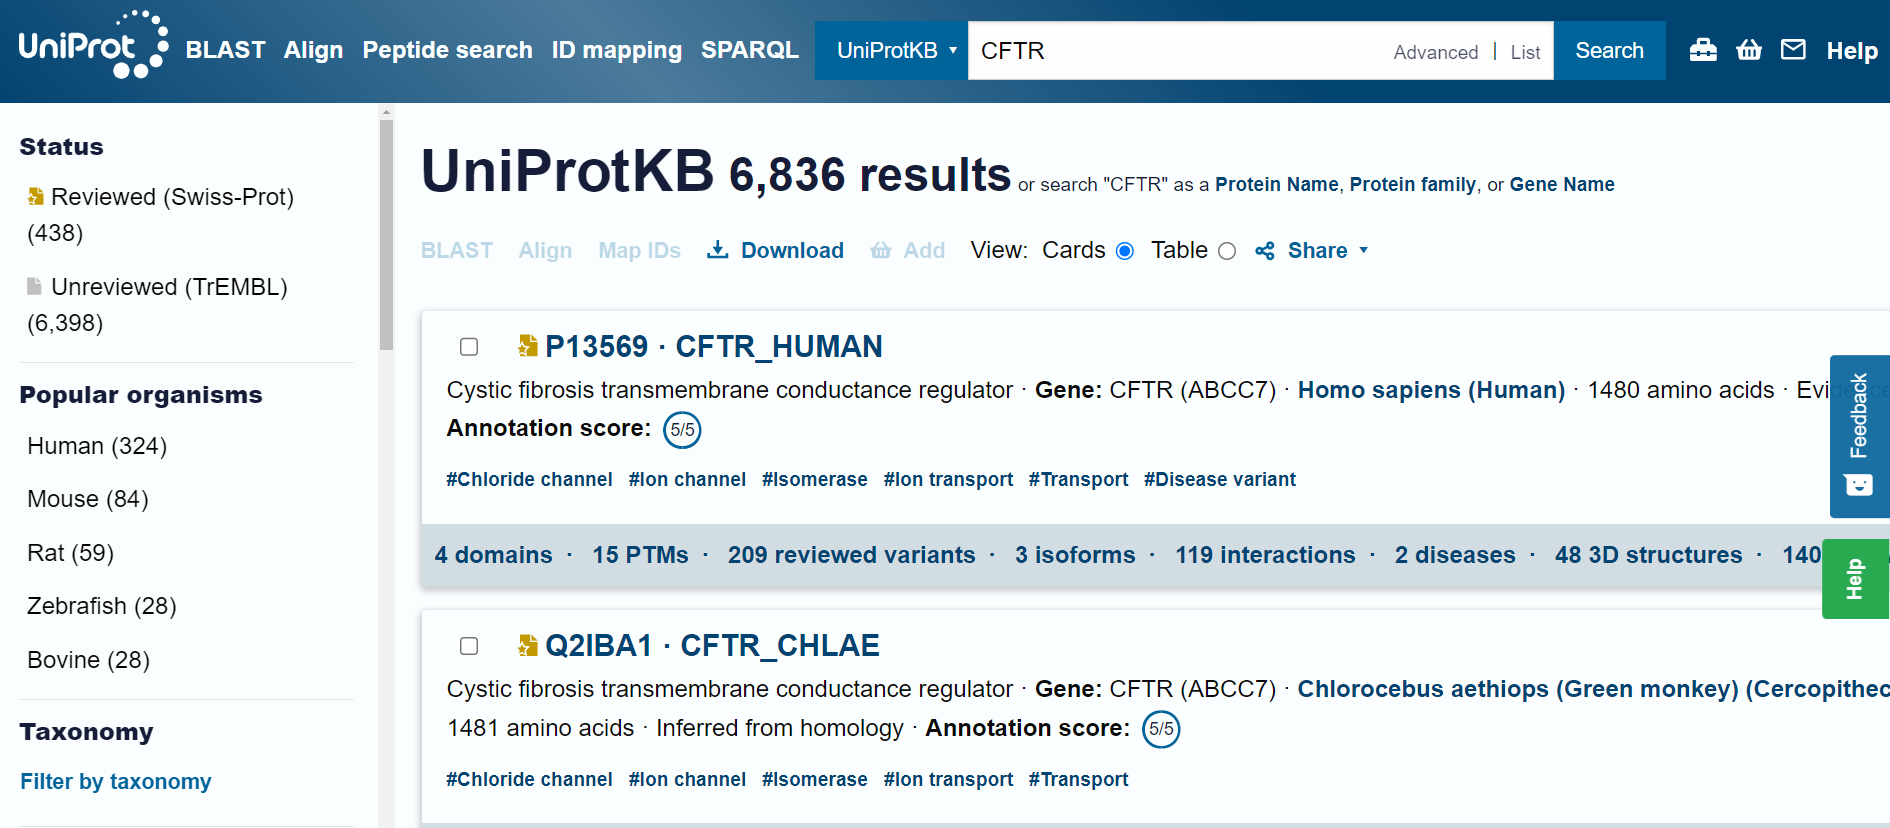

Begin by visiting the [UniProt website](https://www.uniprot.com), which boasts an elegant and functional design.

Initiate a search for "CFTR" and select the first result that appears. You'll observe that the UniProt ID of this protein is **P13569**.

As you scroll down the page, you'll encounter several layers of valuable information about the protein. Upon reaching the end of the page, you'll find the protein sequence and a button to download it in FASTA format.

FASTA is a widely used format for sequences in bioinformatics, serving a broad range of analyses.

# Accessing UniProt Using Python

Retrieving protein sequences through a web browser and interface can be time-consuming and lacks reproducibility, especially when dealing with multiple proteins.

Python, along with libraries like BioPython's SeqIO, can be employed to streamline this process. The initial steps involve installing the necessary libraries, importing them into your script, and defining a function to fetch the protein sequences.


In [ ]:
!pip install biopython
import requests
from Bio import SeqIO
from tempfile import NamedTemporaryFile
import os

def sequence_for_uniprot_id(uniprot_id):
    r = requests.get(f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta")
    r.raise_for_status()

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
        tmp.write(r.text)

    sequence = SeqIO.read(tmp.name, format="fasta")
    os.remove(tmp.name)

    return sequence

In [ ]:
# Now you can get the sequence for any list of proteins by its UniProt IDs
uniprot_ids = ["P13569","Q2IBA1","P35071","Q07DX5","Q2IBE4"]
for uniprot_id in uniprot_ids:
    sequence = sequence_for_uniprot_id(uniprot_id)
    print(f"UniProt ID: {uniprot_id}")
    print(f"Description: {sequence.description}")
    print(f"Sequence: {sequence.seq}\n")

UniProt ID: P13569
Description: sp|P13569|CFTR_HUMAN Cystic fibrosis transmembrane conductance regulator OS=Homo sapiens OX=9606 GN=CFTR PE=1 SV=3
Sequence: MQRSPLEKASVVSKLFFSWTRPILRKGYRQRLELSDIYQIPSVDSADNLSEKLEREWDRELASKKNPKLINALRRCFFWRFMFYGIFLYLGEVTKAVQPLLLGRIIASYDPDNKEERSIAIYLGIGLCLLFIVRTLLLHPAIFGLHHIGMQMRIAMFSLIYKKTLKLSSRVLDKISIGQLVSLLSNNLNKFDEGLALAHFVWIAPLQVALLMGLIWELLQASAFCGLGFLIVLALFQAGLGRMMMKYRDQRAGKISERLVITSEMIENIQSVKAYCWEEAMEKMIENLRQTELKLTRKAAYVRYFNSSAFFFSGFFVVFLSVLPYALIKGIILRKIFTTISFCIVLRMAVTRQFPWAVQTWYDSLGAINKIQDFLQKQEYKTLEYNLTTTEVVMENVTAFWEEGFGELFEKAKQNNNNRKTSNGDDSLFFSNFSLLGTPVLKDINFKIERGQLLAVAGSTGAGKTSLLMVIMGELEPSEGKIKHSGRISFCSQFSWIMPGTIKENIIFGVSYDEYRYRSVIKACQLEEDISKFAEKDNIVLGEGGITLSGGQRARISLARAVYKDADLYLLDSPFGYLDVLTEKEIFESCVCKLMANKTRILVTSKMEHLKKADKILILHEGSSYFYGTFSELQNLQPDFSSKLMGCDSFDQFSAERRNSILTETLHRFSLEGDAPVSWTETKKQSFKQTGEFGEKRKNSILNPINSIRKFSIVQKTPLQMNGIEEDSDEPLERRLSLVPDSEQGEAILPRISVISTGPTLQARRRQSVLNLMTHSVNQGQNIHRKTTASTRKVSLAPQANLTELDIYSRRLSQETGLEISEEINEEDLKECFFDDMESIPAV

## Exercise: Protein Sequence Comparison

In this exercise, you will compare two pairs of proteins based on their amino acid sequences.

**Task:**

1. Retrieve the FASTA sequences of the protein pairs "P13569" / "Q2IBA1" and "P13569" / "Q07DX5".
2. Perform a pairwise alignment to compare the two pairs of sequences.
3. Based on the alignment results, speculate whether Ivacaftor is more likely to improve the function of "Q2IBA1" or "Q07DX5"?

Consider that the FDA has approved Ivacaftor for individuals with the following amino acid substitutions:

|       |       |       |       |       |
|-------|-------|-------|-------|-------|
| E56K  | G178R | S549R | K1060T| G1244E|
| P67L  | E193K | G551D | A1067T| S1251N|
| R74W  | L206W | G551S | G1069R| S1255P|
| D110E | R347H | D579G | R1070Q| D1270N|
| D110H | R352Q | S945L | R1070W| G1349D|
| R117C | A455E | S977F | F1074L|       |
| R117H | S549N | F1052V| D1152H|       |

For more information, click [here](https://pi.vrtx.com/files/uspi_ivacaftor.pdf)

Please write your code in the cell below.




In [57]:
import requests
from Bio import SeqIO
from tempfile import NamedTemporaryFile
import os
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

def sequence_for_uniprot_id(uniprot_id):
    r = requests.get(f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta")
    r.raise_for_status()

    with NamedTemporaryFile(suffix=".fasta", mode="w", delete=False) as tmp:
        tmp.write(r.text)

    sequence = SeqIO.read(tmp.name, format="fasta")
    os.remove(tmp.name)

    return sequence

# Retrieve sequences
seq1 = sequence_for_uniprot_id("P13569")
seq2 = sequence_for_uniprot_id("Q2IBA1")
seq3 = sequence_for_uniprot_id("Q07DX5")

# Perform pairwise alignments
alignments1 = pairwise2.align.globalxx(seq1.seq, seq2.seq)
alignments2 = pairwise2.align.globalxx(seq1.seq, seq3.seq)

# List of amino acid positions of interest
positions_of_interest = [56, 178, 549, 1060, 1244, 67, 193, 551, 1067, 1251, 74, 206, 551, 1069, 1255, 110, 347, 579, 1070, 1270, 110, 352, 945, 1070, 1349, 117, 455, 977, 1074, 117, 549, 1052, 1152]

# Sort the list
positions_of_interest.sort()

# Function to print amino acids of interest
def print_amino_acids_of_interest(alignment, positions_of_interest):
    for i in range(len(alignment[0])):
        if i in positions_of_interest:
            print(f"Position: {i}, Seq1: {alignment[0][i]}, Seq2: {alignment[1][i]}")


# Disclaimer: Please note that this is a teaching exercise designed for educational purposes only.
# The results and interpretations derived from this exercise should not be used for real-world clinical decision-making or diagnosis.

In [58]:
# Print positions of interest in alignment 1

print_amino_acids_of_interest(alignments1[0], positions_of_interest)

Position: 56, Seq1: E, Seq2: E
Position: 67, Seq1: P, Seq2: P
Position: 74, Seq1: R, Seq2: R
Position: 110, Seq1: Y, Seq2: Y
Position: 117, Seq1: E, Seq2: E
Position: 178, Seq1: I, Seq2: I
Position: 193, Seq1: D, Seq2: D
Position: 206, Seq1: -, Seq2: V
Position: 347, Seq1: C, Seq2: C
Position: 352, Seq1: M, Seq2: M
Position: 455, Seq1: E, Seq2: E
Position: 549, Seq1: G, Seq2: G
Position: 551, Seq1: G, Seq2: G
Position: 579, Seq1: D, Seq2: D
Position: 945, Seq1: L, Seq2: L
Position: 977, Seq1: Q, Seq2: Q
Position: 1052, Seq1: F, Seq2: F
Position: 1060, Seq1: K, Seq2: K
Position: 1067, Seq1: R, Seq2: R
Position: 1069, Seq1: P, Seq2: P
Position: 1070, Seq1: I, Seq2: I
Position: 1074, Seq1: L, Seq2: L
Position: 1152, Seq1: I, Seq2: I
Position: 1244, Seq1: G, Seq2: G
Position: 1251, Seq1: E, Seq2: E
Position: 1255, Seq1: F, Seq2: F
Position: 1270, Seq1: G, Seq2: G
Position: 1349, Seq1: R, Seq2: R


In [59]:
# Print positions of interest in alignment 2

print_amino_acids_of_interest(alignments2[0], positions_of_interest)


Position: 56, Seq1: E, Seq2: E
Position: 67, Seq1: P, Seq2: P
Position: 74, Seq1: R, Seq2: R
Position: 110, Seq1: D, Seq2: D
Position: 117, Seq1: R, Seq2: R
Position: 178, Seq1: G, Seq2: G
Position: 193, Seq1: E, Seq2: E
Position: 206, Seq1: L, Seq2: L
Position: 347, Seq1: L, Seq2: L
Position: 352, Seq1: T, Seq2: T
Position: 455, Seq1: L, Seq2: L
Position: 549, Seq1: T, Seq2: T
Position: 551, Seq1: S, Seq2: S
Position: 579, Seq1: Y, Seq2: Y
Position: 945, Seq1: P, Seq2: P
Position: 977, Seq1: K, Seq2: K
Position: 1052, Seq1: L, Seq2: L
Position: 1060, Seq1: I, Seq2: I
Position: 1067, Seq1: S, Seq2: S
Position: 1069, Seq1: K, Seq2: K
Position: 1070, Seq1: G, Seq2: G
Position: 1074, Seq1: L, Seq2: L
Position: 1152, Seq1: S, Seq2: S
Position: 1244, Seq1: F, Seq2: F
Position: 1251, Seq1: R, Seq2: R
Position: 1255, Seq1: L, Seq2: L
Position: 1270, Seq1: L, Seq2: L
Position: 1349, Seq1: D, Seq2: D


## Conclusion

Congratulations on completing the tutorial! 🎉 You've learned how to access UniProt database using Python. You've also performed a simple aminoacid sequence analysis relating bioinformatics and pharmacogenomics.

Keep practicing and exploring these topics. There's a wealth of information waiting to be discovered! 🚀
